## Predicting Heart Disease

In this Case we will be predtivting whether s cudtomer is haveing heart disease or not.
Steps Followed:

1.Problem Defintion
2.Data
3.Evaluation
4.Features
5.Modelling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score,f1_score,recall_score,plot_roc_curve

In [2]:
data=pd.read_csv("heart-disease.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

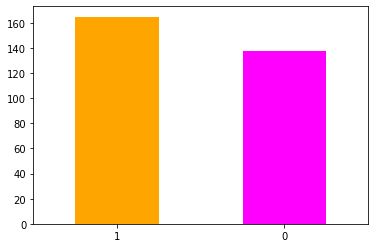

In [9]:
data.target.value_counts().plot(kind="bar",color=["orange","magenta"]);
plt.xticks(rotation=0);


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Compare Target Cilumns with Sex columns using crosstab

In [11]:
pd.crosstab(data["target"],data["sex"])

sex,0,1
target,,
0,24,114
1,72,93


In [1]:
pd.crosstab(data.target,data.sex).plot(kind="bar",color=["salmon","aqua"]
                                      ,figsize=(10,10));
plt.title("Heart Disease According to Sex");
plt.xlabel("0=No disease,1=Heart disease");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


NameError: name 'pd' is not defined

In [13]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


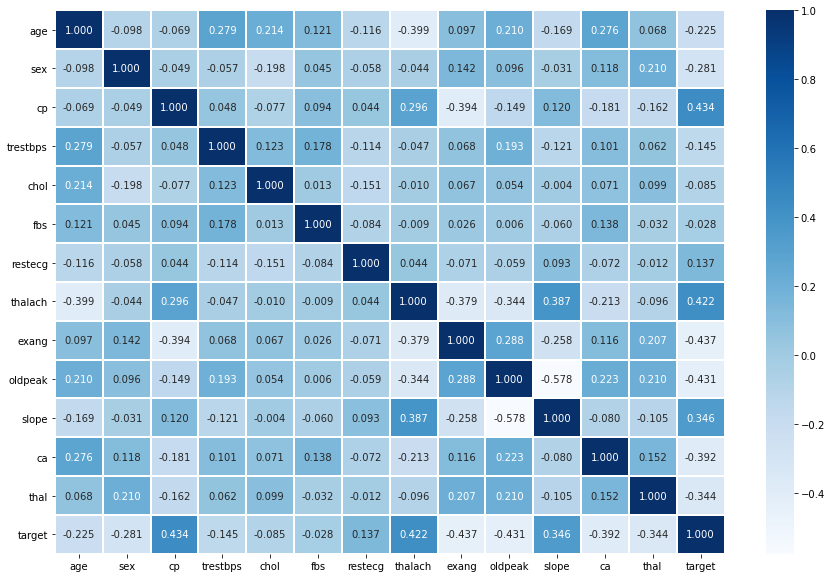

In [14]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=1,
              fmt=".3f",cmap="Blues")

In [15]:
y=data["target"]

In [16]:
x=data.drop(["target"],axis=1)

In [17]:
len(x),len(y)

(303, 303)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [19]:
len(x_train),len(x_test),len(y_train),len(y_test)

(227, 76, 227, 76)

In [20]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.get_params()

C:\Users\Dell\Desktop\M_L\udemy-heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
y_p=lr.predict(x_test)

In [22]:
y_p.shape,len(y_test)

((76,), 76)

In [23]:
accuracy_score(y_test,y_p)

0.7763157894736842

In [24]:
models={"logistic_regression": LogisticRegression(),
       "Knn":KNeighborsClassifier(),
       "Random_forest":RandomForestClassifier()}
def fit_score (models,x_train,x_test,y_train,y_test):
    '''In this function we fitting the trainig data and getting score on test data'''
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [25]:
model_score=fit_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

C:\Users\Dell\Desktop\M_L\udemy-heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model_score

{'logistic_regression': 0.7763157894736842,
 'Knn': 0.6842105263157895,
 'Random_forest': 0.8026315789473685}

In [27]:
model_comp=pd.DataFrame(model_score,index=["acc"])
model_comp

,logistic_regression,Knn,Random_forest
acc,0.776316,0.684211,0.802632


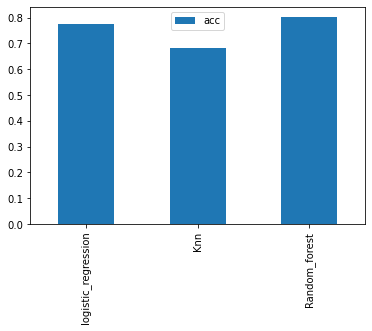

In [28]:
model_comp.T.plot(kind="bar");

## Tunnig KNN using various hyperparameters

In [29]:
neighbors=range(1,21)
train_score=[]
test_score=[]
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    

In [30]:
train_score

[1.0,
 0.8061674008810573,
 0.788546255506608,
 0.7312775330396476,
 0.7665198237885462,
 0.7224669603524229,
 0.73568281938326,
 0.7224669603524229,
 0.7400881057268722,
 0.7136563876651982,
 0.7312775330396476,
 0.7268722466960352,
 0.7312775330396476,
 0.7268722466960352,
 0.7224669603524229,
 0.7224669603524229,
 0.7312775330396476,
 0.7312775330396476,
 0.7400881057268722,
 0.7312775330396476]

In [31]:
test_score

[0.6447368421052632,
 0.5657894736842105,
 0.631578947368421,
 0.6973684210526315,
 0.6842105263157895,
 0.6578947368421053,
 0.6578947368421053,
 0.631578947368421,
 0.7105263157894737,
 0.6842105263157895,
 0.631578947368421,
 0.6447368421052632,
 0.631578947368421,
 0.5921052631578947,
 0.6447368421052632,
 0.5921052631578947,
 0.631578947368421,
 0.618421052631579,
 0.618421052631579,
 0.5789473684210527]

the Maximum Acc. is :71.05%


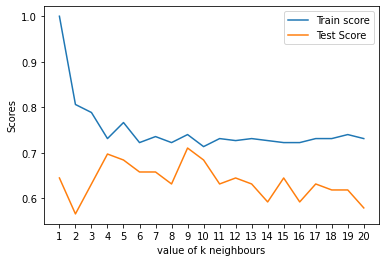

In [32]:
plt.plot(neighbors,train_score,label="Train score");
plt.plot(neighbors,test_score,label="Test Score");
plt.xticks(np.arange(1,21,1))
plt.xlabel("value of k neighbours")
plt.ylabel("Scores")
print(f"the Maximum Acc. is :{max(test_score)*100:.2f}%")
plt.legend();


## Tuning Logistic Regression and Random Forest using RandomSearchedCV

In [33]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange( 1,20,2)}

## Tuning Logistic Regression

In [34]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                              n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [36]:
rs_log_reg.score(x_test,y_test)

0.7894736842105263

## Tunning RandomForestClassifier

In [37]:
np.random.seed(42)
rs_rff=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# Fitting the model
rs_rff.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rff.score(x_test,y_test)

0.75

## Hyperparameters Tuning Using GridSearchedCV

In [39]:
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}
gr_log=GridSearchCV(LogisticRegression(),
                   param_grid=log_reg_grid,
                   cv=5,
                   verbose=True)
gr_log.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gr_log.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [41]:
gr_log.score(x_test,y_test)

0.7894736842105263

## Evaluaing Using AUC-ROC,Confusion Matirix,F1,Recall,Precission,Classification report

#### MAking Prediction

In [47]:
y_preds=gr_log.predict(x_test)
y_preds

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
y_test

286    0
280    0
119    1
202    0
112    1
      ..
238    0
252    0
226    0
146    1
172    0
Name: target, Length: 76, dtype: int64

In [57]:
cm=confusion_matrix(y_test,y_preds)
print(cm)

[[24  8]
 [ 8 36]]


<AxesSubplot:>

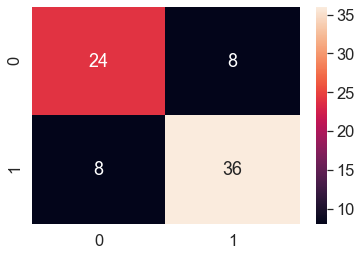

In [65]:
sns.heatmap(cm,annot=True)

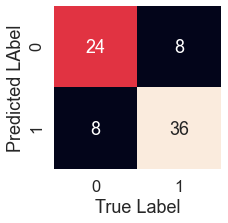

In [64]:
sns.set(font_scale=1.5)
def plot_cm (y_test,y_preds):
    '''
    Plots a nice looking confudion matrix using seaborn
    '''
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(cm,annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted LAbel")
    
plot_cm(y_test,y_preds)    

#### Plotting Roc curve

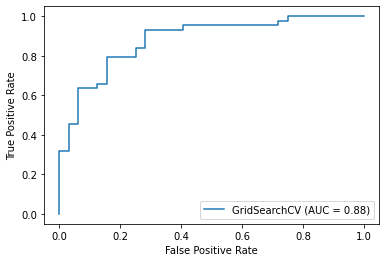

In [56]:
plot_roc_curve(gr_log,x_test,y_test);

## Classifiaction Report

In [67]:
#This is not on cros validation
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.82      0.82      0.82        44

    accuracy                           0.79        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



### Calculating using cross validation
Will be using `cross_val_score ()`

In [69]:
gr_log.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [70]:
clf=LogisticRegression(C=1.3738237958832638,solver="liblinear")


In [99]:
#Cross validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                       cv=5,
                      scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8215300546448088

In [100]:
#cross validated Precission
cv_precission=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring ="precision"
               )
cv_precission=cv_precission.mean()
print(cv_precission.mean())

0.817900063251107


In [101]:
#cross validated Recall
cv_rec=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_rec=cv_rec.mean()
print(cv_rec.mean())

0.8727272727272727


In [102]:
#cross validated F1
cv_f1=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring ="f1"
               )
cv_f1=cv_f1.mean()
print(cv_f1.mean())

0.8431741323998502


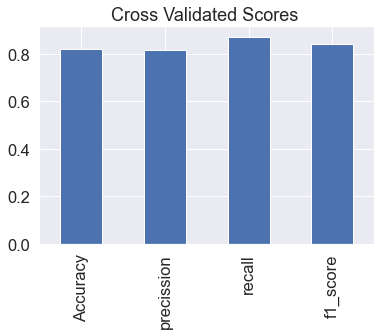

In [107]:
#Visualize cross validated matrix
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "precission":cv_precission,
                        "recall":cv_rec,
                        "f1_score":cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Scores ",legend=False);

## Feature Importance

Which feature affect the target value 

In [112]:
gr_log.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [113]:
clf=LogisticRegression(C= 1.3738237958832638,
                      solver="liblinear")
clf.fit(x_train,y_train);

In [114]:
clf.coef_

array([[-2.58691912e-04, -1.24593654e+00,  9.15488450e-01,
        -1.56644754e-02,  2.39901627e-04,  2.68526677e-02,
         6.44324681e-01,  2.37653969e-02, -1.16761446e+00,
        -5.41224623e-01,  5.29155168e-01, -6.03635120e-01,
        -6.63519707e-01]])

In [115]:
feature_dict=dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.00025869191195905896,
 'sex': -1.2459365399186824,
 'cp': 0.9154884502446862,
 'trestbps': -0.015664475432262525,
 'chol': 0.0002399016271617291,
 'fbs': 0.02685266770244062,
 'restecg': 0.6443246807448134,
 'thalach': 0.023765396874021773,
 'exang': -1.1676144563522601,
 'oldpeak': -0.541224622707233,
 'slope': 0.5291551683946181,
 'ca': -0.6036351197629531,
 'thal': -0.6635197069621277}

<AxesSubplot:title={'center':'Feature Importance'}>

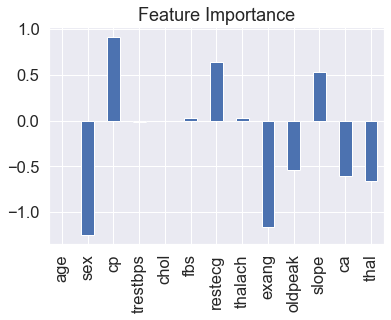

In [118]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [120]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
from joblib